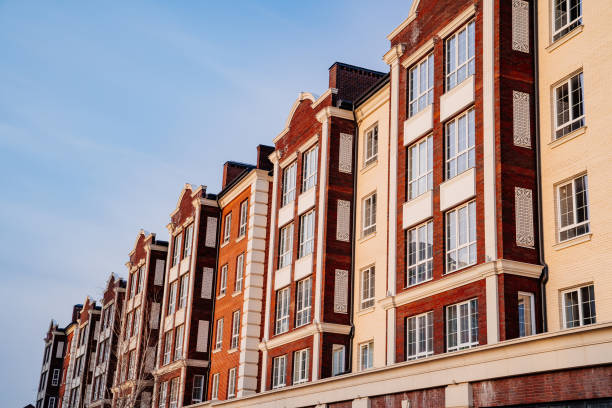

# Housing Project

Author: Christine Li

## Overview
For this project, I will use regression modeling to predict house pricing in a northwestern county.


## Business Problem: Predicting Home Sale Pricing In King County for Targeted Renovations.

**Stakeholder:** Real Estate Agency

**Objective:**
The objective of this project is to create a regression model to predict home sale pricing in King County. 

Using this tool, homeowners can then make informed decisions about targeted renovations to increase the estimated value of their homes.

# Obtaining The Data

This project will use the King County House Sales dataset.
This datset contains information on historic home sales and property features within the target real estate of King County. This dataset contains features such as square footage, number of bedrooms, bathrooms etc.  


**Column names and descriptions for King County Data Set.**
- id - unique identifier for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Understanding the following features in our dataset allows us to collect the relevant information necessary for our regression model. Certain features are typically associated with an increase in housing prices due to various reasons related to the perceived value of a property. Examples:

*Square Footage:*
   - Larger homes generally have more usable living space, which is often perceived as a valuable feature.
   - More square footage can provide additional rooms, storage space, and overall comfort.

*Number of Bedrooms:*
   - The number of bedrooms is a key factor in determining the capacity and flexibility of a home.
   - Larger families or individuals looking for guest rooms may prefer homes with more bedrooms.

*Number of Bathrooms:*
   - More bathrooms, especially if they are well-designed and luxurious, are often considered an attractive feature.
   - Additional bathrooms contribute to convenience and comfort, particularly in larger homes.

*Floors:*
   - Multi-story houses may be perceived as more spacious and provide separation between living and sleeping areas.
   - Different floor levels can offer unique views and architectural appeal.

*Condition:*
   - A well-maintained and good overall condition of the property adds to its perceived value.
   - Buyers often prefer homes that require less immediate maintenance or renovation.
 




In [1]:
#Importing the necessary libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import scipy.stats as stats


In [3]:
king = pd.read_csv('/Users/christineli/Desktop/project2/dsc-phase-2-project/data/kc_house_data.csv', index_col = 0)
king.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

We can see there there is a large datset containing more than 20 000 entries and 20 columns. Almost every column contains numeric data which is convenient for linear regression.

In [5]:
king.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


For each record there are the predictors for the housing price including features like bedrooms, bathrooms, square footage of the home etc. 

Looking at the means for predictors, the average price for a home in the Northwestern County is $540296 for a 3 bedroom and 2 bathroom house.


## Scrub:

**Data Preparation**

- Clean data


Our target variable is **price** and the other features in the dataset are a predictors.


In [6]:
#There are 21597 data entries in total in this dataset.

king.isna().sum()
#There are 2376 null values in waterfront column, 
#63 null values in view column and
#3842 null values in yr_renovated column


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
king['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
king['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
king['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Looking at the *missing values*: <br>
waterfront is denoted being present by 1 and absent with a 0, we can see that majority of the column contains 0. I will fill the missing values with 0. 

yr_renovated shows that majority of these houses have not been renovated before as denoted by the 0, and since there are more than 17000 records being not renovated, I will just remove this column completely.

The view column only has 63 missing values compared to the other two columns. I will fill this column with the mean to avoid losing a lot of the data.

In [10]:
king['waterfront'].fillna(0, inplace = True)
king['view'].fillna(np.mean(king['view']), inplace = True)
king.drop('yr_renovated', axis = 1, inplace=True)



In [11]:
king.isna().sum() #checking that no missing values remain in data

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis and Visualisation:


Looking at the distribution of the features in King County:

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

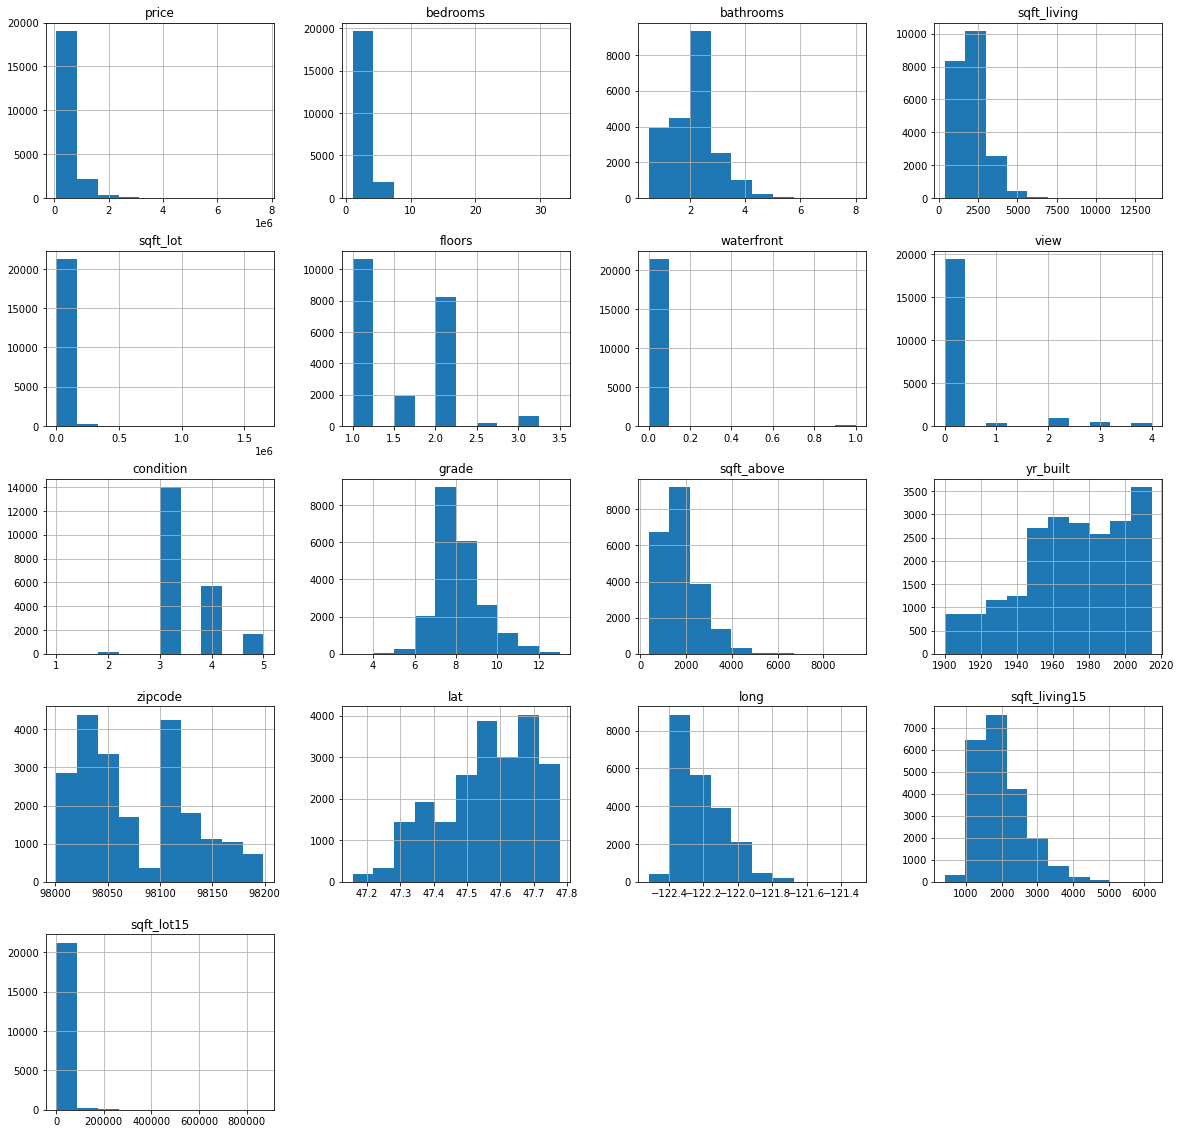

In [12]:
king.hist(figsize = (20,20))

When we look at these histograms, none of the variables are 'normal'. We can see major skew either in the positive or negative direction in almost every predictor. We can also see that some of the variables do not follow a normal distribution with the expected bell curve shape.

Our target variable 'price' can also be shown to have major positive skew.

Because of the skewness of this data, we need to transform the data first otherwise it could lead to problems in our analysis. 


Let's first have a closer look at the pricing distribution of the houses in King County.

We can see that there is a noticeable right skew, which suggests that there are more variety of houses on the expensive side.

[Text(0.5, 0, 'Price in Millions'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, "Price Density of Houses in King's County")]

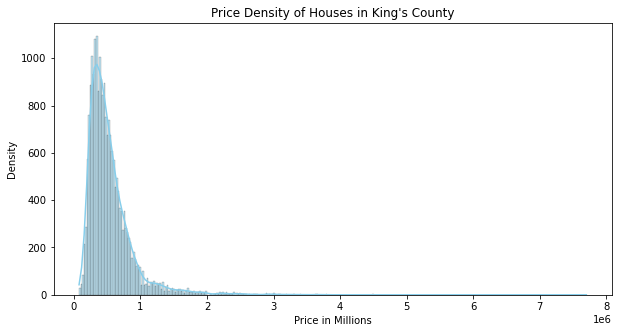

In [13]:
plt.figure(figsize = (10, 5))
price_dist = sns.histplot(king['price'], kde = True, bins='auto', color='skyblue')
price_dist.set(xlabel = "Price in Millions", ylabel = "Density", title = "Price Density of Houses in King's County")

**What features will affect the price?**
Taking a closer look at some variables to further understand the data set.

Example: Number of bedrooms

/Users/christineli/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


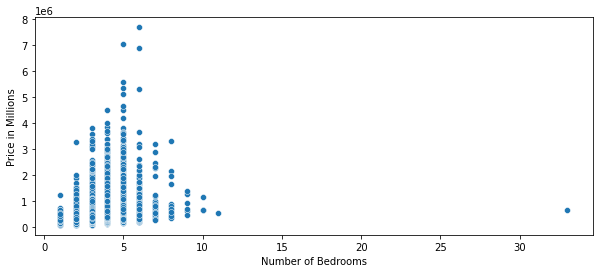

In [14]:
plt.figure(figsize = (10,4))
PvF = sns.scatterplot(king['bedrooms'], king['price'])
PvF.set(xlabel = 'Number of Bedrooms', ylabel = 'Price in Millions')
plt.show()

Example: Number of Bathrooms 

/Users/christineli/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


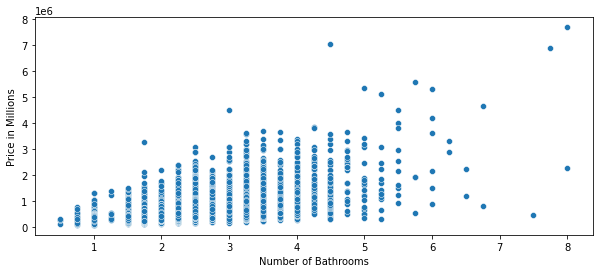

In [15]:
plt.figure(figsize = (10,4))
PvC = sns.scatterplot(king['bathrooms'], king['price'])
PvC.set(xlabel = 'Number of Bathrooms', ylabel = 'Price in Millions')
plt.show()

Example: Condition

/Users/christineli/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


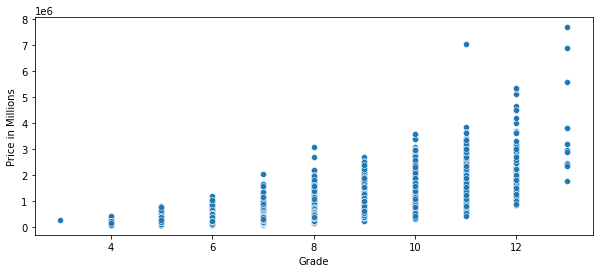

In [16]:
plt.figure(figsize = (10,4))
PvC = sns.scatterplot(king['grade'], king['price'])
PvC.set(xlabel = 'Grade', ylabel = 'Price in Millions')
plt.show()

Example: Square Foot Living

/Users/christineli/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


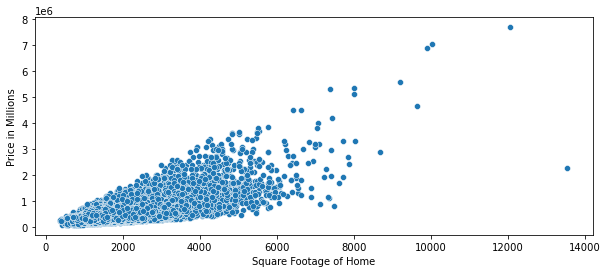

In [17]:
plt.figure(figsize = (10,4))
PvC = sns.scatterplot(king['sqft_living'], king['price'])
PvC.set(xlabel = 'Square Footage of Home', ylabel = 'Price in Millions')
plt.show()

Looking at the variables for use in the dataset, I will select some variables that might affect the housing prices. Some of these variables would be what the homeowner can target when they're renovating in order to increase the house price.

**Columns that might affect the dependent variable (price):** bedrooms, bathrooms, waterfront, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built.


**Columns that might not affect the dependent variable (price):** date, view, lat, long, yr_renovated, sqft_living15, sqft_lot15, zipcode. So I will be removing these columns. 

-----------
I will be removing sqft_above and sqft_basement columns as these added together gives the sqft_living (to prevent possible multicollinearity).

A reminder that yr_renovated was removed in the cleaning process.


In [18]:
king_clean = king.drop(columns = ['date', 'lat', 'long','sqft_living15', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'zipcode', 'view'])
#this information is not relevant to our model

In [19]:
king_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [20]:
king_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


In [21]:
#Current variables in the king dataset:
#Categorical variables: floors, bedrooms, bathrooms, waterfront, condition, grade
#Continuous variables: price (target), sqft_living, sqft_lot, yr_built

#Identify categorical variables
categoricals = ['bedrooms','bathrooms', 'floors','waterfront','condition', 'grade']

#Implement dummies
king_ohe = pd.get_dummies(king_clean[categoricals], prefix = 'categoricals', drop_first=True)
king_prepped = king_clean.drop(columns = ['bedrooms', 'bathrooms','floors','condition', 'waterfront', 'grade'])

king_ohe_prepped = pd.concat([king_prepped, king_ohe], axis=1)
king_ohe_prepped


,price,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors,waterfront,condition,grade
id,,,,,,,,,,
7129300520,221900.0,1180,5650,1955,3,1.00,1.0,0.0,3,7
6414100192,538000.0,2570,7242,1951,3,2.25,2.0,0.0,3,7
5631500400,180000.0,770,10000,1933,2,1.00,1.0,0.0,3,6
2487200875,604000.0,1960,5000,1965,4,3.00,1.0,0.0,5,7
1954400510,510000.0,1680,8080,1987,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,1530,1131,2009,3,2.50,3.0,0.0,3,8
6600060120,400000.0,2310,5813,2014,4,2.50,2.0,0.0,3,8
1523300141,402101.0,1020,1350,2009,2,0.75,2.0,0.0,3,7


We're interested in finding out which variables that are most strongly correlated with price as these variable will be good for inclusion in our model.

In [22]:
#To understand the correlation structure, removing the target variable price 
#to see how the predictors relate to each other.

king_copy = king_ohe_prepped.drop(columns=['price'])
king_copy

,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors,waterfront,condition,grade
id,,,,,,,,,
7129300520,1180,5650,1955,3,1.00,1.0,0.0,3,7
6414100192,2570,7242,1951,3,2.25,2.0,0.0,3,7
5631500400,770,10000,1933,2,1.00,1.0,0.0,3,6
2487200875,1960,5000,1965,4,3.00,1.0,0.0,5,7
1954400510,1680,8080,1987,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...,...,...,...
263000018,1530,1131,2009,3,2.50,3.0,0.0,3,8
6600060120,2310,5813,2014,4,2.50,2.0,0.0,3,8
1523300141,1020,1350,2009,2,0.75,2.0,0.0,3,7


In [23]:
king_copy.corr()

,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors,waterfront,condition,grade
sqft_living,1.000000,0.173453,0.318152,0.578212,0.755758,0.353953,0.104637,-0.059445,0.762779
sqft_lot,0.173453,1.000000,0.052946,0.032471,0.088373,-0.004814,0.021459,-0.008830,0.114731
yr_built,0.318152,0.052946,1.000000,0.155670,0.507173,0.489193,-0.024487,-0.361592,0.447865
bedrooms,0.578212,0.032471,0.155670,1.000000,0.514508,0.177944,-0.002127,0.026496,0.356563
bathrooms,0.755758,0.088373,0.507173,0.514508,1.000000,0.502582,0.063629,-0.126479,0.665838
floors,0.353953,-0.004814,0.489193,0.177944,0.502582,1.000000,0.020797,-0.264075,0.458794
waterfront,0.104637,0.021459,-0.024487,-0.002127,0.063629,0.020797,1.000000,0.016648,0.082818
condition,-0.059445,-0.008830,-0.361592,0.026496,-0.126479,-0.264075,0.016648,1.000000,-0.146896
grade,0.762779,0.114731,0.447865,0.356563,0.665838,0.458794,0.082818,-0.146896,1.000000


In [24]:
abs(king_copy.corr()) > 0.75
df = king_copy.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']    #cc for correlation coefficient

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(bathrooms, sqft_living)",0.755758


sqft_living, grade and bathrooms have high correlation.
<br>
It appears that the variable sqft_living is the common factor in both correlation pairs so might have to *remove* or *transform* sqft_living to prevent multicollinearity. 


## Model:

## Baseline Model

In [25]:
#Run the baseline model
predictors = king_copy #This is the dataset without the price variable
X = predictors
X_int = sm.add_constant(X)
y = king['price']


baseline_model = sm.OLS(y, X_int).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4370.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:30:41   Log-Likelihood:            -2.9619e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.695e+06    1.3e+05     51.593      0.000    6.44e+06    6.95e+06
sqft_living   177.2180      3.303     53.646      0.000     170.743     183.693
sqft_lot       -0.2430      0.037     -6.605      0.000      -0.315      -0.171
yr_built    -3846.0915     66.732    -57.635      0.000   -3976.891   -3715.291
bedrooms    -4.257e+04   2050.780    -20.757      0.000   -4.66e+04   -3.85e+04
bathrooms    5.078e+04   3455.360     14.695      0.000     4.4e+04    5.76e+04
floors         2.1e+04   3459.928      6.069      0.000    1.42e+04    2.78e+04
waterfront   7.551e+05   1.84e+04     41.124      0.000    7.19e+05    7.91e+05
condition    1.896e+04   2488.359      7.620      0.000    1.41e+04    2.38e+04
grade        1.301e+05   2156.111     60.319      0.000    1.26e+05    1.34e+05
==============================================================================
Omnibus:                    15869.187   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1011405.789
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                      36.005   Cond. No.                     3.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Baseline Model Comments:**

**R^2 value:** 0.64 <br>
64% of the variance in the target variable price can be explained by the predictor features and also means around 64% of the data fits on the regression model. 

**p value:** 0 <br>
The p-value is lower than 0.05 so we can reject the null hypothesis.
 
The condition number is large, 2.14e+21. This indicates that there might be strong multicollinearity or other numerical problems.


### Check for mandatory linearity assumptions

(with the first iteration of the model)
1. There is a linear relationship between predictors and target 
2. Residuals follow a normal distribution
3. Residuals are homoscedastic

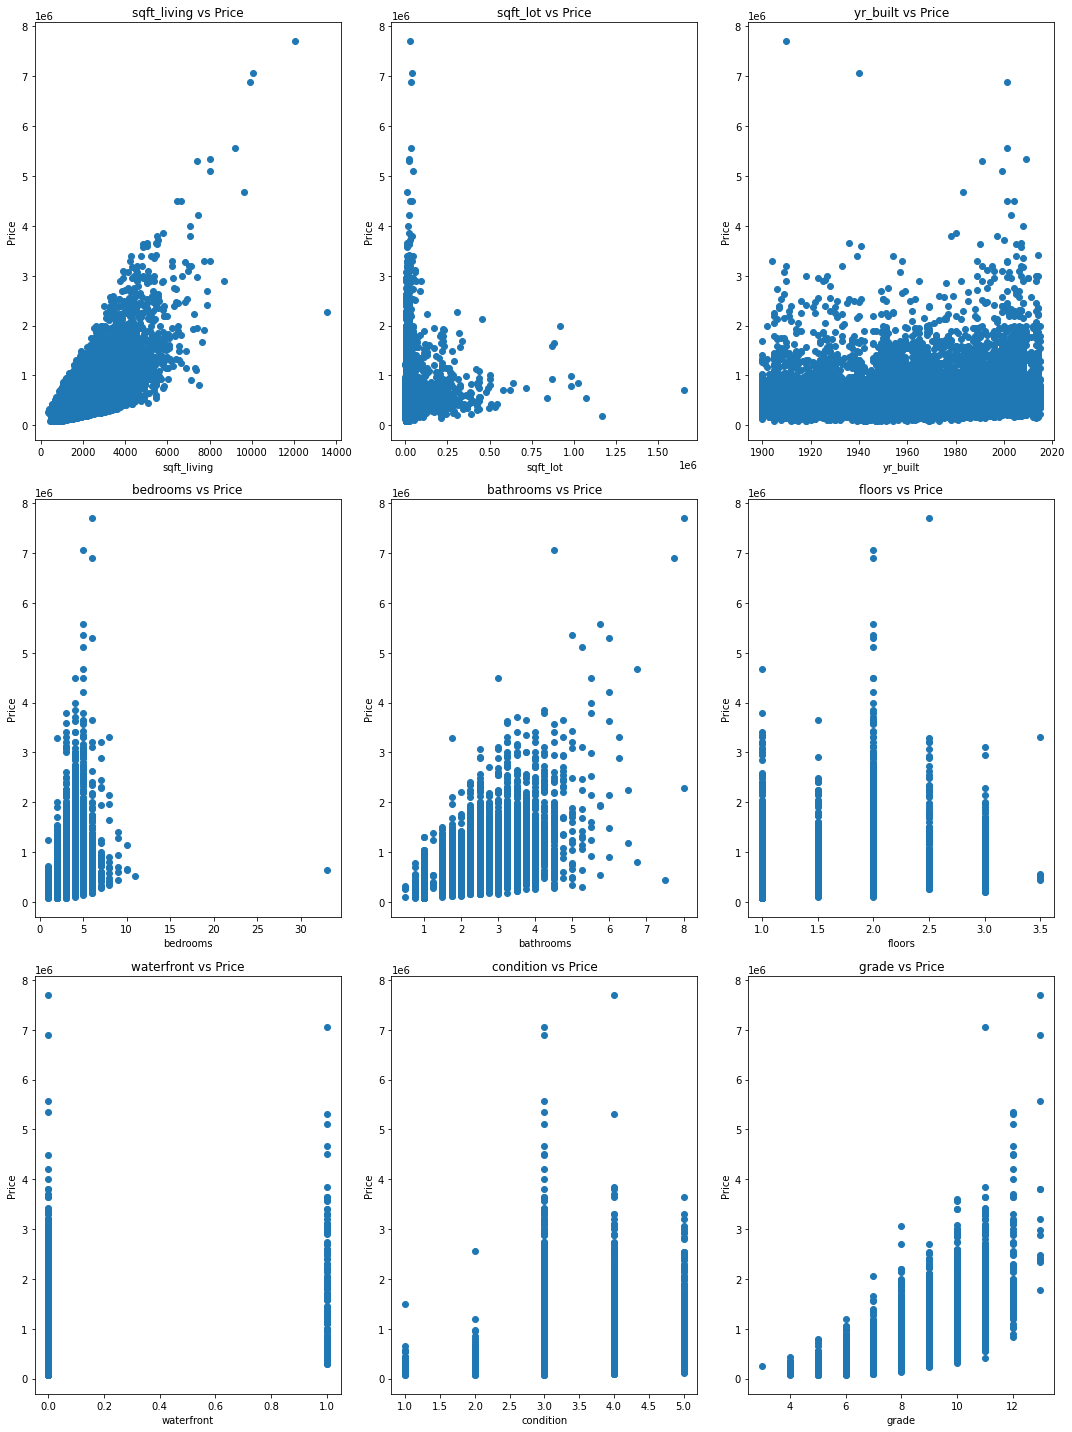

In [26]:
# There is a linear relationship

# Visualize the relationship between the features and the response using scatterplots
columns_to_plot = king_copy

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for index, column in enumerate(columns_to_plot):
    ax = axes[index]
    ax.scatter(columns_to_plot[column], king['price'])
    ax.set_title(f'{column} vs Price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Looking at the scatter plots, bedrooms, bathroom, sqft_living, sqft_lot and grade have some sort of linear relationship with the variable price. 

Floors, conditions, waterfront, yr_built does not have a linear relationship with price so would not be appropriate to be used in our model.

Mean of Residuals 3.0434329780090757e-09


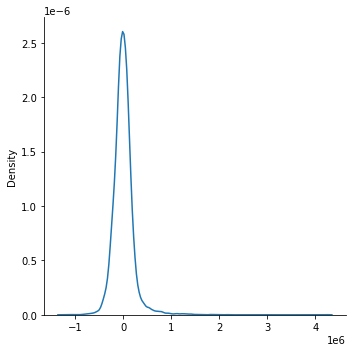

In [27]:
#Residuals follow a normal distribution
residuals = baseline_model.resid
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

sns.displot(residuals, kind = 'kde')

Looking at the plot, the residuals follow the normal distribution so this assumption is met.

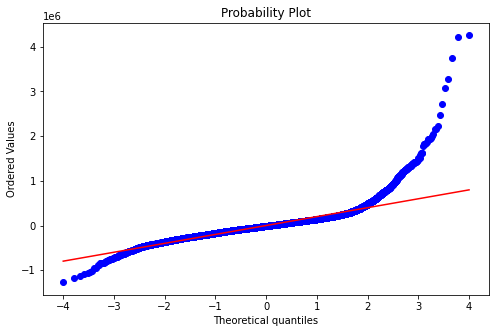

In [28]:
#We can also double check this with the QQ plot
import scipy as sp

fig, ax = plt.subplots(figsize = (8, 5))
sp.stats.probplot(residuals, plot = ax, fit = True)
plt.show()

#Most of the data points fall on the line so meets the normality assumption.

Text(0.5, 0.99, 'Residuals Scatterplot')

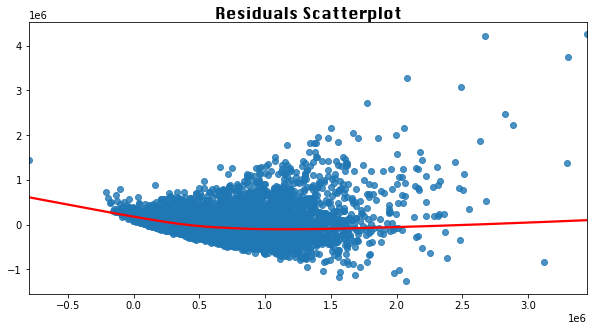

In [29]:
#Residuals are homoscedastic 
plt.figure(figsize=(10,5))
sns.regplot(x=baseline_model.predict(), y=baseline_model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

Looking at this graph, the residuals seem to be distributed in a cone shape and not uniformly across.
This indicates heteroscedascity which means that the assumption has been violated.

It appears that we still need to transform the data in order to meet the linearity assumptions and create a model with better R^2 value. 

## Model Iteration 2 <br>

Everything in the baseline and remove the multicollinearity

In [30]:
king_copy  
#Reminder of the clean King dataset with the dummies implemented 
#and price removed

,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors,waterfront,condition,grade
id,,,,,,,,,
7129300520,1180,5650,1955,3,1.00,1.0,0.0,3,7
6414100192,2570,7242,1951,3,2.25,2.0,0.0,3,7
5631500400,770,10000,1933,2,1.00,1.0,0.0,3,6
2487200875,1960,5000,1965,4,3.00,1.0,0.0,5,7
1954400510,1680,8080,1987,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...,...,...,...
263000018,1530,1131,2009,3,2.50,3.0,0.0,3,8
6600060120,2310,5813,2014,4,2.50,2.0,0.0,3,8
1523300141,1020,1350,2009,2,0.75,2.0,0.0,3,7


As a reminder (seen above) there are two high correlation pairs between grade and sqft_living and bathrooms and sqft_living.

We will transform and standardise sqft_living to reduce multicollinearity. I chose not to remove sqft_living as it has a strong linear relationship with price and is considered to be an important variable for potential buyers when looking to buy a home. 


In [31]:
#Log transformation and normalisation in only continuous data (no categorical data here)
#Continuous variables:, sqft_living, sqft_lot, yr_built
#yr_built has no linear relationship so removing

continuous = ['sqft_living', 'sqft_lot']
king_continuous = king_copy[continuous]
log_names = [f'{column}_log' for column in king_continuous.columns]

king_log = np.log(king_continuous)
king_log.columns = log_names

king_log

,sqft_living_log,sqft_lot_log
id,,
7129300520,7.073270,8.639411
6414100192,7.851661,8.887653
5631500400,6.646391,9.210340
2487200875,7.580700,8.517193
1954400510,7.426549,8.997147
...,...,...
263000018,7.333023,7.030857
6600060120,7.745003,8.667852
1523300141,6.927558,7.207860


In [32]:
#Normalize the transformed variables

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

king_log_norm = king_log.apply(normalize)
king_log_norm

,sqft_living_log,sqft_lot_log
id,,
7129300520,-1.125556,-0.388430
6414100192,0.709446,-0.113241
5631500400,-2.131893,0.244475
2487200875,0.070674,-0.523914
1954400510,-0.292725,0.008139
...,...,...
263000018,-0.513206,-2.171594
6600060120,0.458007,-0.356901
1523300141,-1.469061,-1.975378


In [33]:
#Floors, condition, waterfront, yr_built have no linear relationship
#Not using those variables in this iteration

cat = ['bedrooms', 'bathrooms', 'grade']
king_copy_cat = king_copy[cat]

predictors2 = pd.concat([king_log_norm,king_copy_cat], axis =1)
predictors2

,sqft_living_log,sqft_lot_log,bedrooms,bathrooms,grade
id,,,,,
7129300520,-1.125556,-0.388430,3,1.00,7
6414100192,0.709446,-0.113241,3,2.25,7
5631500400,-2.131893,0.244475,2,1.00,6
2487200875,0.070674,-0.523914,4,3.00,7
1954400510,-0.292725,0.008139,3,2.00,8
...,...,...,...,...,...
263000018,-0.513206,-2.171594,3,2.50,8
6600060120,0.458007,-0.356901,4,2.50,8
1523300141,-1.469061,-1.975378,2,0.75,7


In [34]:
#Run iteration 2

X2 = predictors2
y2 = np.log(king['price']) #Log transforming price to remove heteroscedasticity
X2_int = sm.add_constant(X2)


model2 = sm.OLS(y2, X2_int).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5327.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:31:04   Log-Likelihood:                -8113.9
No. Observations:               21597   AIC:                         1.624e+04
Df Residuals:                   21591   BIC:                         1.629e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.6835      0.029    404.211      0.000      11.627      11.740
sqft_living_log     0.2258      0.005     44.582      0.000       0.216       0.236
sqft_lot_log       -0.0368      0.003    -14.072      0.000      -0.042      -0.032
bedrooms           -0.0275      0.003     -8.082      0.000      -0.034      -0.021
bathrooms          -0.0247      0.005     -4.828      0.000      -0.035      -0.015
grade               0.1972      0.003     61.156      0.000       0.191       0.203
==============================================================================
Omnibus:                      105.466   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.954
Skew:                           0.172   Prob(JB):                     5.96e-24
Kurtosis:                       2.978   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comments:**

**R^2 value:** 0.55 <br> 
55% of the variance in the target variable price can be explained by the predictor features and means around 55% of the data fits on the regression model. 

**p-value:** 0
We can reject the null hypothesis.
 
The condition number is now reduced, indicated we have dealt with multicollinearity.

Text(0.5, 0.99, 'Residuals Scatterplot')

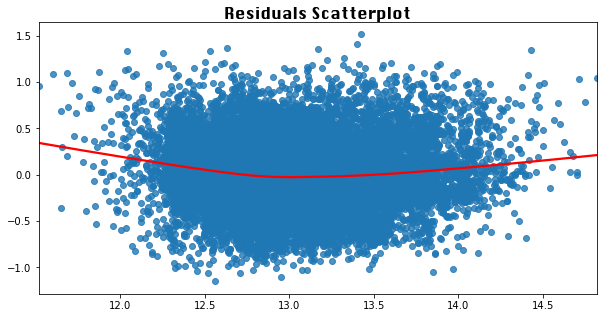

In [35]:
#Double-checking our homoscedascity assumption is now met.

plt.figure(figsize=(10,5))
sns.regplot(x=model2.predict(), y=model2.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

Looking at the plot now, we can see that the residuals are now more uniform across and our homoscedascity assumption is now met.

## Model 3 

Iteration 2 and Model Validation

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42)
print("Length of the training and test set:", len(X_train), len(X_test), len(y_train), len(y_test))

Length of the training and test set: 16197 5400 16197 5400


In [37]:
X_train_constant = sm.add_constant(X_train)
model3 = sm.OLS(y_train, X_train_constant).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     4013.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:31:24   Log-Likelihood:                -6090.9
No. Observations:               16197   AIC:                         1.219e+04
Df Residuals:                   16191   BIC:                         1.224e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.6881      0.034    345.508      0.000      11.622      11.754
sqft_living_log     0.2281      0.006     38.437      0.000       0.216       0.240
sqft_lot_log       -0.0376      0.003    -12.436      0.000      -0.044      -0.032
bedrooms           -0.0315      0.004     -7.695      0.000      -0.040      -0.023
bathrooms          -0.0227      0.006     -3.798      0.000      -0.034      -0.011
grade               0.1978      0.004     53.026      0.000       0.191       0.205
==============================================================================
Omnibus:                       84.909   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.118
Skew:                           0.177   Prob(JB):                     1.99e-19
Kurtosis:                       2.952   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X_test_constant = sm.add_constant(X_test)

model3_test = sm.OLS(y_test, X_test_constant).fit()
model3_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1315.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:31:24   Log-Likelihood:                -2020.1
No. Observations:                5400   AIC:                             4052.
Df Residuals:                    5394   BIC:                             4092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.6812      0.056    208.724      0.000      11.571      11.791
sqft_living_log     0.2208      0.010     22.605      0.000       0.202       0.240
sqft_lot_log       -0.0345      0.005     -6.626      0.000      -0.045      -0.024
bedrooms           -0.0186      0.006     -3.039      0.002      -0.031      -0.007
bathrooms          -0.0303      0.010     -3.042      0.002      -0.050      -0.011
grade               0.1949      0.006     30.372      0.000       0.182       0.207
==============================================================================
Omnibus:                       21.959   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.113
Skew:                           0.156   Prob(JB):                     1.58e-05
Kurtosis:                       3.035   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model 3 Comments:**

**R^2 value:** 0.55 <br>
This is the same as our second model iteration, 55% of the variance in the target variable price can be explained by the predictor features.  

**p value:** 0 <br>
The p-value is lower than 0.05 so we can reject the null hypothesis.



In [39]:
#using sklearn to run regression to get predictions
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

In [41]:
train_residuals = y_predict_train - y_train
test_residuals = y_predict_test - y_test

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)


Train Mean Squared Error: 0.1242102185507966
Test Mean Squared Error: 0.12391428468291346


Comparing the model summary between the training dataset and test dataset we can see that it is very similar between the two validating that the model.

By also checking the mean squared error (MSE) between the train and test, we can see that there is not a big difference between the train and test MSE, indicating that we are not overfitting. 

The MSE and R^2 values for train and test subsets are similar, therefore suggesting the model will perform similarly on different data.




## Interpret:

**Final model interpretation**

We have created a multiple linear regression model that predicts the price for a house in King County given the desired parameters for sqft_living, sqft_lot, bedrooms, bathrooms and grade. 

p-value: We were able to reject the null hypothesis that there is no relationship between price and the features. Each feature had a p-value of less than 0.05, which means that each of these features has an effect on house pricing. 

R^2 (Coefficient of Determination): R^2 can fall between 0 and 1 and the higher the R^2 value, the higher the predictive power. Our model is not perfect, the R^2 value is 0.55 which means only 50% of the variation in price is being explained by our selected features. 

Coefficient term tells us the change in Y for a unit change in X. For example if grade rises by one-unit, than the price rises by 0.1949. We can also see that there are negative coefficients, for example this means that if bathrooms increase by one-unit than price decreases by -0.0186.

Mean Squared Error: This value gives an approximation of how well our regression fits our data. The lower the MSE, the better the fit. Our MSE is around 0.12 between both our test and training model which means we are not overfitting and will perform similarly when exposed to new data. 




-----------------------
**Features that have strong relationships with housing prices.**

Grade and sqft_living have a strong relationship with housing prices. These features share a strong linear relationship with price, have relatively low multicollinearity, a low p-value rejecting the null hypothesis and a positive coefficient. Rejecting the null hypothesis suggests that these features do indeed have an effect on the price. The linearity regressions assumptions of the model are met with these features included.

Square footage and grade are the best predictors of a house's price in King County. We can see that these variables are positively related to price and therefore to get the best price for the house, renovations should be done in these areas. 
Homeowners should target their renovations into increasing the square footage and consider increasing number of bathrooms/bedrooms as well as and improving the overall quality of the house. 


---------
**Limitations**

The model does have some limitations. Some of the challenges faced was that some of the variables had to be log-transformed to satisfy the multiple regression assumptions and therefore any new data would have to go through the same process. 

Looking at the original distribution of the variables, there was some outliers that were not removed from the model. In the future when applying new data, further consideration would need to be made on whether it is worth removing the outliers or not as outliers inherently can skew and influence the results.


Future iterations of the model can be made to explore the best predictors of the prices of homes outside of King County as well in order to allow the model to be come more widely used. 
